In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
df=pd.read_csv('financial_loan.csv')
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500.0,4.0,1009.0
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000.0,4.0,3939.0
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000.0,11.0,3522.0
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500.0,9.0,4911.0
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500.0,28.0,3835.0


In [ ]:
coldrop=['member_id','id']
df_dropped = df.drop(columns=coldrop)

In [ ]:
df.isnull().sum()

id                         0
address_state              0
application_type           0
emp_length                 0
emp_title                598
grade                      1
home_ownership             1
issue_date                 1
last_credit_pull_date      1
last_payment_date          1
loan_status                1
next_payment_date          1
member_id                  1
purpose                    1
sub_grade                  1
term                       1
verification_status        1
annual_income              1
dti                        1
installment                1
int_rate                   1
loan_amount                1
total_acc                  1
total_payment              1
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

id                       0
address_state            0
application_type         0
emp_length               0
emp_title                0
grade                    0
home_ownership           0
issue_date               0
last_credit_pull_date    0
last_payment_date        0
loan_status              0
next_payment_date        0
member_id                0
purpose                  0
sub_grade                0
term                     0
verification_status      0
annual_income            0
dti                      0
installment              0
int_rate                 0
loan_amount              0
total_acc                0
total_payment            0
dtype: int64

In [ ]:
columns_of_interest = [
     'application_type', 'emp_length', 'grade', 'home_ownership',
    'loan_status', 'purpose', 'sub_grade',
    'term', 'verification_status']

unique_values = {col: df[col].unique() for col in columns_of_interest}


for column, values in unique_values.items():
    print(f"Unique values in {column}: {values}")
    print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

Unique values in application_type: ['INDIVIDUAL']
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Unique values in emp_length: ['< 1 year' '9 years' '4 years' '10+ years' '3 years' '5 years' '1 year'
 '6 years' '2 years' '7 years' '8 years']
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Unique values in grade: ['C' 'E' 'B' 'A' 'D' 'F' 'G']
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Unique values in home_ownership: ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'NONE']
---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19951 entries, 0 to 20547
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19951 non-null  int64  
 1   address_state          19951 non-null  object 
 2   application_type       19951 non-null  object 
 3   emp_length             19951 non-null  object 
 4   emp_title              19951 non-null  object 
 5   grade                  19951 non-null  object 
 6   home_ownership         19951 non-null  object 
 7   issue_date             19951 non-null  object 
 8   last_credit_pull_date  19951 non-null  object 
 9   last_payment_date      19951 non-null  object 
 10  loan_status            19951 non-null  object 
 11  next_payment_date      19951 non-null  object 
 12  member_id              19951 non-null  float64
 13  purpose                19951 non-null  object 
 14  sub_grade              19951 non-null  object 
 15  term   

In [ ]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,1.995100e+04,1.995100e+04,1.995100e+04,19951.000000,19951.000000,19951.000000,19951.000000,19951.000000,19951.000000
mean,6.786356e+05,8.434550e+05,6.615058e+04,0.140898,337.875100,0.115839,10922.175580,22.319282,11892.973585
std,2.178315e+05,2.751338e+05,4.907859e+04,0.063536,204.250318,0.034133,6456.053515,11.247679,7738.035441
min,5.574200e+04,8.548300e+04,4.080000e+03,0.000000,21.740000,0.054200,700.000000,2.000000,84.000000
25%,5.023270e+05,6.455525e+05,4.047550e+04,0.093000,186.615000,0.089000,6000.000000,14.000000,6188.000000
50%,6.535070e+05,8.352080e+05,5.745000e+04,0.141800,300.680000,0.114900,10000.000000,21.000000,10396.000000
75%,8.389360e+05,1.048802e+06,8.000000e+04,0.191100,439.030000,0.139200,14800.000000,29.000000,15855.500000
max,1.077430e+06,1.314167e+06,2.039784e+06,0.299900,1305.190000,0.241100,35000.000000,90.000000,57835.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19951 entries, 0 to 20547
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19951 non-null  int64  
 1   address_state          19951 non-null  object 
 2   application_type       19951 non-null  object 
 3   emp_length             19951 non-null  object 
 4   emp_title              19951 non-null  object 
 5   grade                  19951 non-null  object 
 6   home_ownership         19951 non-null  object 
 7   issue_date             19951 non-null  object 
 8   last_credit_pull_date  19951 non-null  object 
 9   last_payment_date      19951 non-null  object 
 10  loan_status            19951 non-null  object 
 11  next_payment_date      19951 non-null  object 
 12  member_id              19951 non-null  float64
 13  purpose                19951 non-null  object 
 14  sub_grade              19951 non-null  object 
 15  term   

In [ ]:
df[['id','loan_amount','total_payment']].sort_values('loan_amount',ascending=False).head(10).reset_index(drop=True)

,id,loan_amount,total_payment
0,1065110,35000.0,26017.0
1,1057239,35000.0,54427.0
2,1066155,35000.0,28062.0
3,1065896,35000.0,37306.0
4,1061681,35000.0,36105.0
5,1007211,35000.0,41042.0
6,874463,35000.0,39437.0
7,708935,35000.0,39865.0
8,834002,35000.0,41492.0
9,971188,35000.0,45710.0


In [ ]:
 grouped_df_based_purpose = df.groupby('purpose').agg({
    'loan_amount': 'sum',
    'total_payment': 'sum'
}).reset_index()


purpose_sorted_grouped_df = grouped_df_based_purpose.sort_values('loan_amount',
                                                                  ascending=False).head(10).reset_index(drop=True)

print(purpose_sorted_grouped_df)

              purpose  loan_amount  total_payment
0  Debt consolidation  151029700.0    163159659.0
1         credit card   56981600.0     63156476.0
2                 car    9897025.0     10960581.0


In [ ]:
grouped_df_based_emp_length= df.groupby('emp_length').agg({
    'loan_amount': 'mean',
    'annual_income': 'mean'
}).reset_index()
emp_length_sorted_grouped_df = grouped_df_based_emp_length.sort_values('loan_amount',
                                                                       ascending=False).head(10).reset_index(drop=True).round(2)

print(emp_length_sorted_grouped_df)

  emp_length  loan_amount  annual_income
0  10+ years     12402.69       76895.73
1    9 years     11742.30       73762.62
2    8 years     11715.72       69561.33
3    7 years     11258.40       65491.60
4    6 years     10953.17       64670.26
5    5 years     10912.13       65729.60
6    4 years     10680.67       63317.42
7    3 years     10495.22       63528.42
8    2 years     10217.53       60347.20
9     1 year      9916.67       60631.11


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,19951.0,678635.596511,217831.547025,55742.0000,502327.000,653507.0000,8.389360e+05,1.077430e+06
member_id,19951.0,843454.984211,275133.756579,85483.0000,645552.500,835208.0000,1.048802e+06,1.314167e+06
annual_income,19951.0,66150.584397,49078.588625,4080.0000,40475.500,57450.0000,8.000000e+04,2.039784e+06
dti,19951.0,0.140898,0.063536,0.0000,0.093,0.1418,1.911000e-01,2.999000e-01
installment,19951.0,337.875100,204.250318,21.7400,186.615,300.6800,4.390300e+02,1.305190e+03
int_rate,19951.0,0.115839,0.034133,0.0542,0.089,0.1149,1.392000e-01,2.411000e-01
loan_amount,19951.0,10922.175580,6456.053515,700.0000,6000.000,10000.0000,1.480000e+04,3.500000e+04
total_acc,19951.0,22.319282,11.247679,2.0000,14.000,21.0000,2.900000e+01,9.000000e+01
total_payment,19951.0,11892.973585,7738.035441,84.0000,6188.000,10396.0000,1.585550e+04,5.783500e+04


In [ ]:
selected_columns = ['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment']
df_selected = df[selected_columns]

corr1 = df_selected.corr()
corr1

,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
annual_income,1.000000,-0.135534,0.298619,0.035944,0.299317,0.272577,0.286146
dti,-0.135534,1.000000,0.070401,0.100825,0.078279,0.210905,0.075220
installment,0.298619,0.070401,1.000000,0.240121,0.948576,0.222177,0.897832
int_rate,0.035944,0.100825,0.240121,1.000000,0.223694,-0.075289,0.242549
loan_amount,0.299317,0.078279,0.948576,0.223694,1.000000,0.246350,0.906969
total_acc,0.272577,0.210905,0.222177,-0.075289,0.246350,1.000000,0.210390
total_payment,0.286146,0.075220,0.897832,0.242549,0.906969,0.210390,1.000000


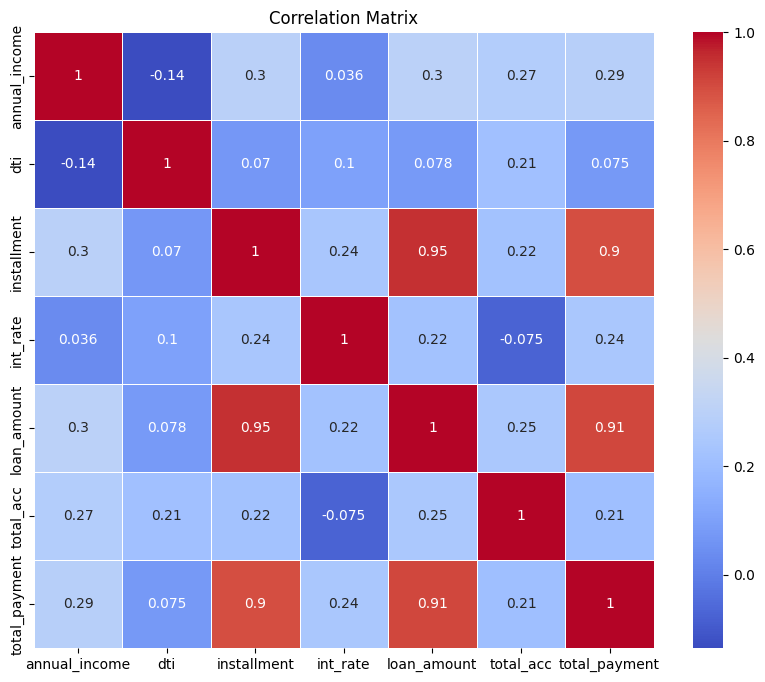

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

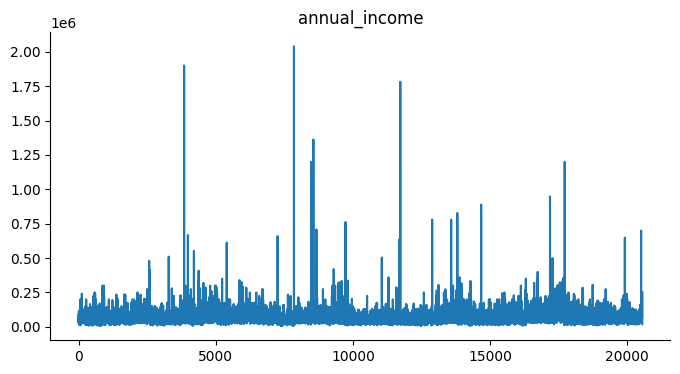

In [ ]:
df['annual_income'].plot(kind='line', figsize=(8, 4), title='annual_income')
plt.gca().spines[['top', 'right']].set_visible(False)

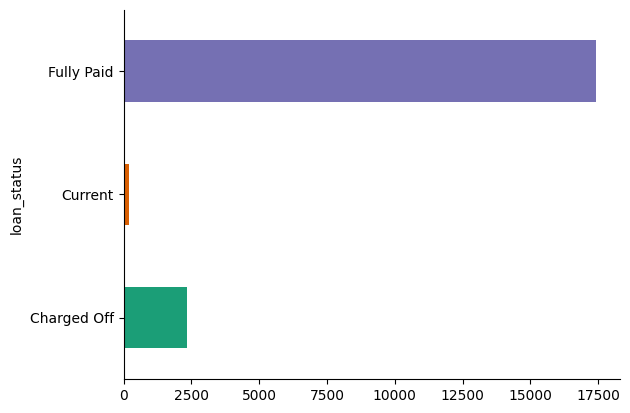

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('loan_status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

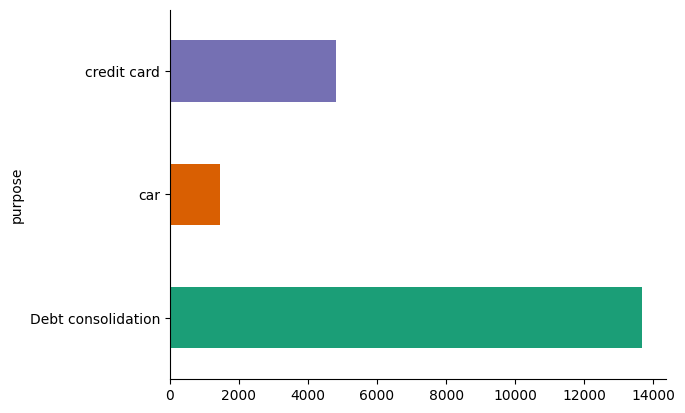

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('purpose').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

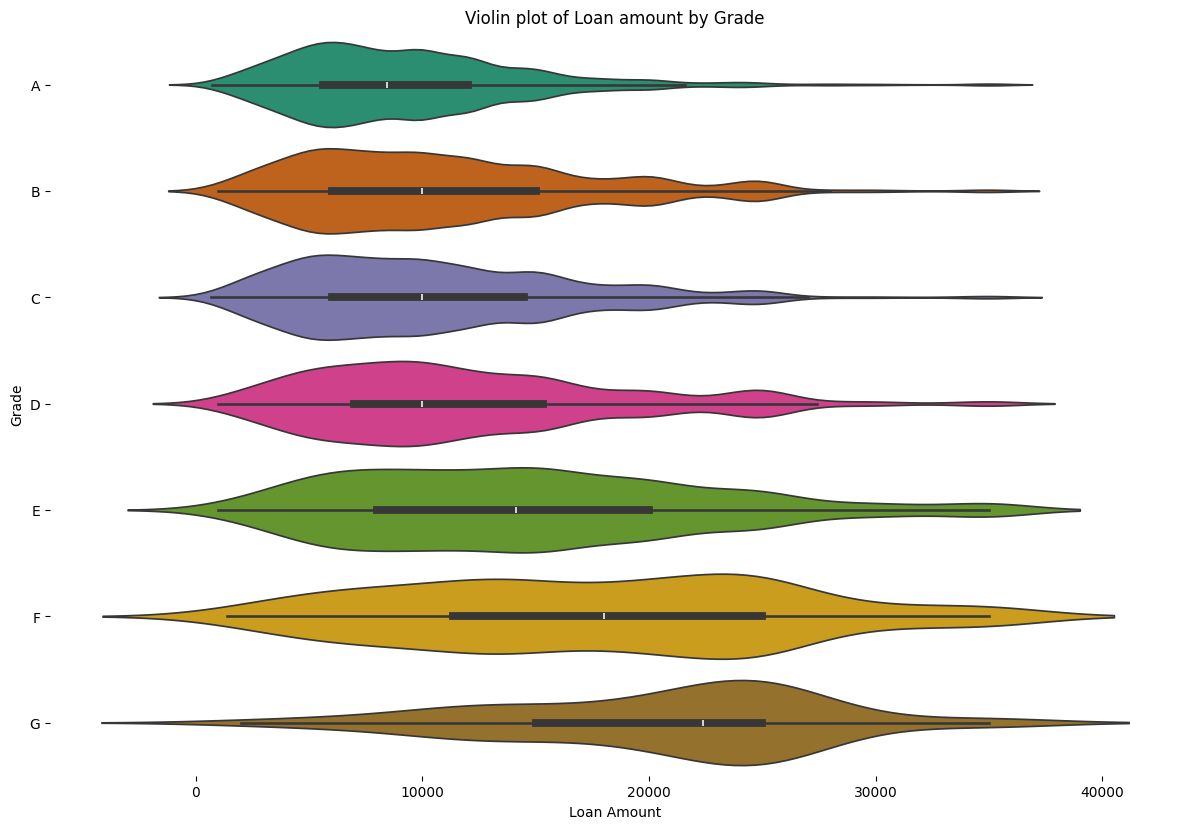

In [ ]:
df_sorted = df.sort_values('grade')

figsize = (12, 1.2 * len(df['grade'].unique()))
plt.figure(figsize=figsize)

sns.violinplot(data=df_sorted, x='loan_amount', y='grade', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Violin plot of Loan amount by Grade')
plt.xlabel('Loan Amount')
plt.ylabel('Grade')

plt.tight_layout()
plt.show()